In [4]:
!mamba install pandas

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.639 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        3.0.0                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   


In [5]:
%pip install seaborn

mambajs 0.19.13

Process pip requirements ...

Requirement numpy already satisfied.
Requirement pandas already satisfied.
Requirement matplotlib already satisfied.


In [6]:
import pandas as pd # biblioteka za rad sa tabelarnim podacima, odnosno data frames i serijama (series).
import numpy as np # osnovna biblioteka za numeričke proračune.
import seaborn as sns # biblioteka za vizualizaciju podataka, zapravo nadogradnja na Matplotlib.

In [7]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
titanic.info
#tianic.info()

# 1️⃣ Sa zagradama () → RADNJA
# Kad želiš da Python nešto uradi
# ➡ izvršava se kod
# ➡ dobiješ rezultat ili ispis

# 2️⃣ Bez zagrada → OBJEKAT / REFERENCA
# Kad želiš samu funkciju, a ne njeno izvršavanje

# Postavi sebi pitanje:
# „Da li hoću da Python sada nešto uradi?“
# ✅ DA → ()
# ❌ NE, samo pokazujem → bez ()


<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

## Provera nedostajućih vrednosti

Pre početka analize podataka, neophodno je proveriti da li u skupu podataka postoje nedostajuće vrednosti (*missing values*), jer one mogu značajno uticati na rezultate analize i modele.

### Najčešći načini provere

- **Pregled osnovnih informacija o podacima**
  - Korišćenjem metode `info()` može se videti broj ne-nedostajućih vrednosti po kolonama.

- **Provera ukupnog broja nedostajućih vrednosti po kolonama**
  - Metode `isnull()` i `sum()` omogućavaju brz uvid u to koliko vrednosti nedostaje u svakoj koloni.

- **Provera da li uopšte postoje nedostajuće vrednosti**
  - Funkcija `any()` omogućava proveru da li skup podataka sadrži barem jednu nedostajuću vrednost.

### Značaj provere nedostajućih vrednosti

- sprečava pogrešne statističke zaključke  
- omogućava pravilan izbor metode za popunjavanje ili uklanjanje podataka  
- poboljšava kvalitet daljih analiza i modela  

Provera nedostajućih vrednosti je jedan od prvih i najvažnijih koraka u procesu **eksplorativne analize podataka (EDA)**.


In [9]:
#titanic.isnull() # da li ih ima po vrstama i kolonama
#titanic.isnull().any() # da li ih ima po kolonama (true/false)
titanic.isnull().any().any()  # da li ih uopste ima (true/false)

np.True_

In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Izbacivanje nedostajućih vrednosti

Ukoliko je procenat nedostajućih vrednosti mali ili njihov izostanak ne narušava strukturu podataka, moguće je izvršiti **izbacivanje redova ili kolona** koje sadrže nedostajuće vrednosti.

### Načini izbacivanja nedostajućih vrednosti

- **Izbacivanje redova sa nedostajućim vrednostima**
  - Metoda `dropna()` uklanja sve redove koji sadrže barem jednu nedostajuću vrednost.

- **Izbacivanje kolona sa nedostajućim vrednostima**
  - Korišćenjem parametra `axis=1` moguće je ukloniti kolone koje sadrže nedostajuće vrednosti.

- **Uklanjanje na osnovu praga**
  - Parametar `thresh` omogućava zadržavanje samo onih redova ili kolona koje imaju dovoljan broj popunjenih vrednosti.

### Prednosti i nedostaci

**Prednosti:**
- jednostavna i brza implementacija  
- smanjenje šuma u podacima  
- pogodno za male količine nedostajućih vrednosti  

**Nedostaci:**
- mogući gubitak značajne količine podataka  
- potencijalno narušavanje reprezentativnosti skupa podataka  

Izbacivanje nedostajućih vrednosti treba primenjivati **oprezno** i uvek uz prethodnu analizu obima i značaja izgubljenih podataka.


In [11]:
# Velicina pre izbacivanja
size_with_na = len(titanic)
size_with_na

891

In [12]:
# Velicina nakon izbacivanja
size_without_na = len(titanic.dropna())
size_without_na

182

In [13]:
# Izgubili smo 80 % skupa 
size_without_na/size_with_na * 100

20.42648709315376

 **Da li izbaciti kolone koje imaju dosta nedostajućih vrednosti?** (kao što su deck ili age)

## Popunjavanje default vrednostima

Popunjavanje podrazumevanim (*default*) vrednostima koristi se kada je poznato koja vrednost ima smisla zameniti nedostajuće podatke, bez značajnog narušavanja analize.

Najčešće se koristi:
- `0` za numeričke kolone  
- najčešća vrednost (*mode*) za kategorijske kolone  
- fiksna vrednost koja ima poslovno ili logičko značenje  

Ova metoda je brza i jednostavna, ali se primenjuje samo kada je izbor podrazumevane vrednosti opravdan.


In [14]:
titanic['age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [15]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, str): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**.unique()**
👉 vraća sve jedinstvene (različite) vrednosti koje se pojavljuju u toj koloni<br>
Sta da izaberemo kao default-nu vrednost?

<Axes: >

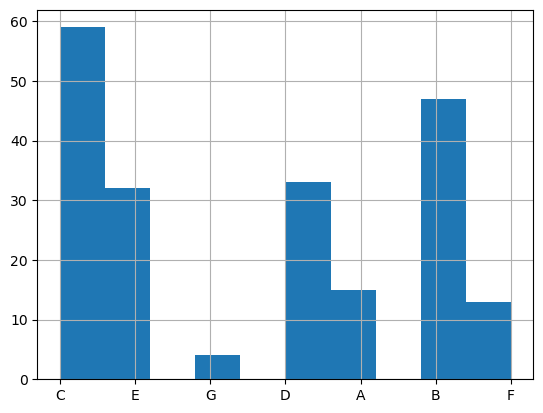

In [18]:
titanic['deck'].hist()

**.hist()** 👉 pokušava da nacrta histogram (raspodelu vrednosti)

⚠️ Bitna stvar<br>
Histogram je namenjen ***numeričkim podacima***, a deck je ***kategorijska kolona*** (A, B, C, …).<br>
Zato:<br>
  - Pandas **ne crta pravi histogram**<br>
  - interno mapira kategorije na brojeve<br>
  - grafikon **nema statistički smisao**<br>

Može izgledati kao da “radi”, ali je pogrešna vizualizacija ❌

- **Tip podatka:** Numerički  
  **Vizualizacija:** `hist()`

- **Tip podatka:** Kategorijski  
  **Vizualizacija:** `countplot()` ili `value_counts()`

## Popunjavanje unapred / unazad

Popunjavanje unapred (*forward fill*) i unazad (*backward fill*) koristi se kada podaci imaju redosled (npr. vremenske serije).

- **Popunjavanje unapred (`ffill`)**  
  Nedostajuće vrednosti se popunjavaju poslednjom poznatom vrednošću.

- **Popunjavanje unazad (`bfill`)**  
  Nedostajuće vrednosti se popunjavaju sledećom poznatom vrednošću.


In [19]:
#titanic['age']
#titanic['age']=titanic['age'].ffill() da zaista izmeni podatak
titanic['age'].ffill() #ne menja zaista
titanic['age'].bfill() #ne menja zaista
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

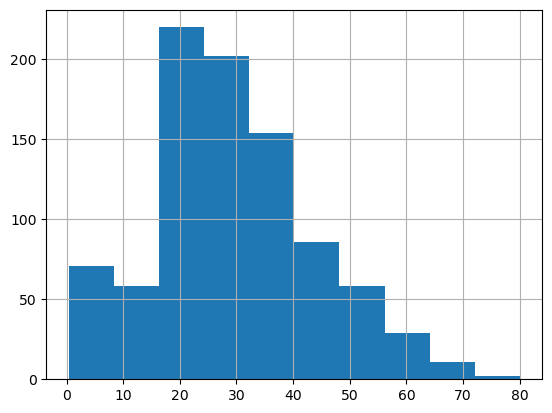

In [20]:
titanic['age'].ffill().hist()

<h4>Postoji li bolji nacin za prikaz?

**KORELACIJA** <br><br>
🧠 Šta ta linija radi?<br>

- Računa **korelaciju između numeričkih kolona** u DataFrame-u titanic<br>
- Rezultat je **korelaciona matrica**<br>
- Svaka vrednost pokazuje **jačinu i smer veze** između dve promenljive<br>

  📌 Kako da čitaš rezultate?

Vrednosti su između -1 i 1:

- **1** → savršena pozitivna veza<br>
- **-1** → savršena negativna veza<br>
- **0** → nema linearne veze<br>

Primer značenja:

- veća vrednost → jača veza<br>
- znak (+ / -) → smer veze

In [21]:
# titanic.corr()   

# ne radi
# radi samo nad tipovima koji su number i boolean
# NA ISPITNOJ MASINI RADI

In [22]:
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

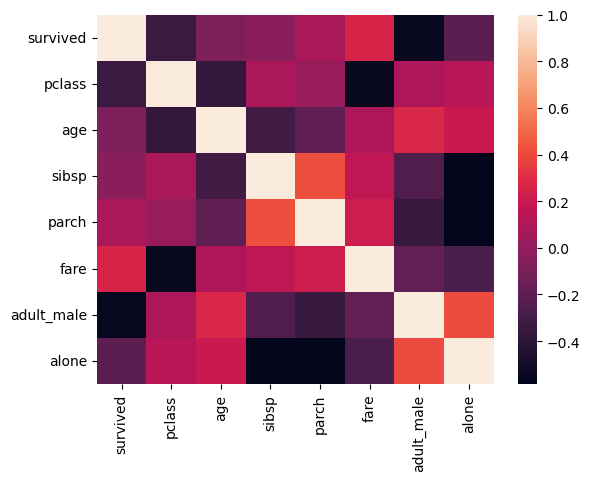

In [23]:
sns.heatmap(titanic.corr(numeric_only=True))

## Mean / Median fill

Mean / median fill je metoda popunjavanja nedostajućih vrednosti u numeričkim kolonama korišćenjem:

- **mean** (aritmetičke sredine) ili <br>

- **median** (medijane) kolone

Ideja je da se nedostajuće vrednosti zamene centralnom vrednošću podataka.

<h4>Kada koristiti koji?

- **Mean** (sredina)

     - kada podaci nemaju izražene ekstremne vrednosti

    - kada je raspodela približno simetrična

- **Median** (medijana)

    - kada postoje outlier-i

    - kada je raspodela asimetrična


In [24]:
titanic['age'].fillna(titanic['age'].mean())
#titanic['age'].fillna(titanic['age'].mean()).hist()

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [25]:
titanic['age'].fillna(titanic['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

## Mean / Median with groupby

***Mean / median with groupby*** je metoda popunjavanja nedostajućih vrednosti gde se nedostajuće vrednosti<br> 
zamenjuju srednjom vrednošću ili medijanom unutar određene grupe, umesto globalnom vrednošću cele kolone.

In [26]:
titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

Primer rada sa kategorickim atributom:

In [27]:
titanic['embark_town'] = titanic['embark_town'].astype('category')
titanic['embark_town'] = titanic['embark_town'].cat.codes
titanic['embark_town'] = titanic['embark_town'].fillna(titanic.groupby(['pclass', 'alive'])['embark_town'].transform('median'))
titanic['embark_town']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embark_town, Length: 891, dtype: int8